#### Causal inference in multivariate time series

In [172]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
import random
import pathlib
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from scms import StructuralCausalModels
from renyiDAG import generate_dag_and_time_series
# from TSGen import RandomCausalSimulator
from TSGen import CausalSimulator

np.random.seed(1)

Adjacency Matrix:
[[0 1 0 0 1 1 1 1 1]
 [0 0 1 1 1 1 1 0 1]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 0 1]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]

Sample Data:
         Z0        Z1        Z2        Z3        Z4        Z5        Z6  \
0  0.239325  0.295246  0.291108  0.204293  0.008633  0.252919  0.292111   
1  0.684820  0.534860  0.286028  0.321313  0.214150  0.245896  0.458513   
2  0.659668  0.571340  0.299616  0.493383  0.297156  0.429804  0.513641   
3  0.499564  0.624111  0.282931  0.425464  0.467713  0.611642  0.781409   
4  0.399393  0.405248  0.604946  0.737550  0.790930  0.867395  0.863527   

         Z7        Z8  
0  0.442292  0.200924  
1  0.443647  0.203737  
2  0.448235  0.649803  
3  0.719039  0.919707  
4  0.760277  0.816056  


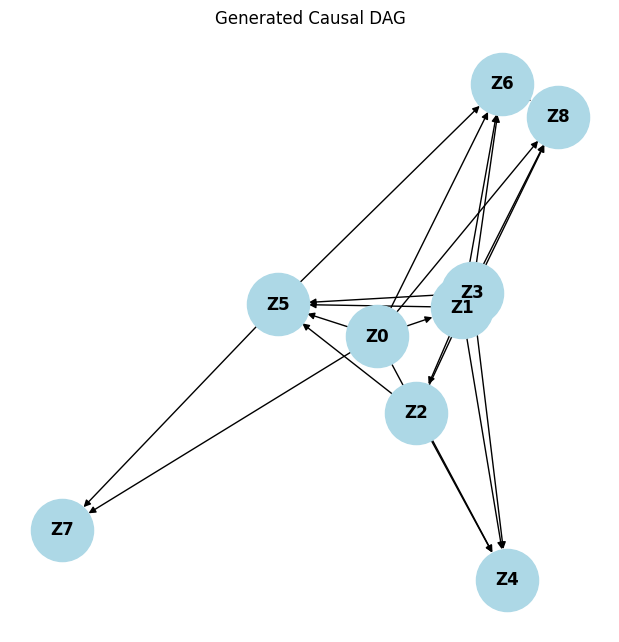

In [180]:
n_nodes = 9 # Total variables (10 variables)
edge_prob = 0.66     # Probability of edge creation
nonlinear_prob = 0.50 # Chance of nonlinearity per edge              
timesteps = 500

sim = CausalSimulator(n_nodes, edge_prob, nonlinear_prob, 0.0, timesteps, seed=42)
df, graph = sim.simulate()  # Only df and adj returned

print("Adjacency Matrix:")
print(graph)
print("\nSample Data:")
print(df.head())

sim.draw_dag()


<Axes: >

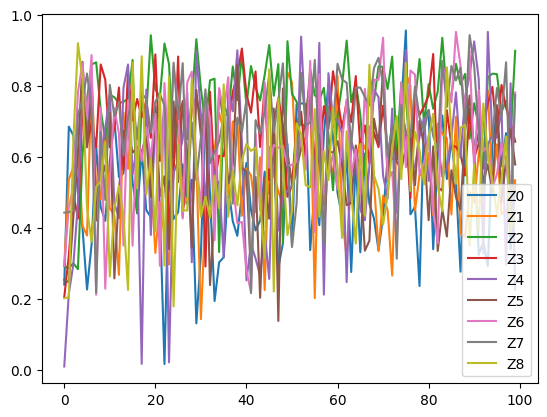

In [181]:
df.iloc[:100, ].plot()

In [27]:
df.iloc[:50, ].corr()

,Z0,Z1,Z2,Z3,Z4,Z5
Z0,1.000000,0.160862,-0.176395,0.011771,0.001667,-0.107173
Z1,0.160862,1.000000,0.000592,0.201214,0.536903,0.152965
Z2,-0.176395,0.000592,1.000000,0.382532,0.335864,0.276298
Z3,0.011771,0.201214,0.382532,1.000000,0.449008,0.612374
Z4,0.001667,0.536903,0.335864,0.449008,1.000000,0.641400
Z5,-0.107173,0.152965,0.276298,0.612374,0.641400,1.000000


In [ ]:
# Example Configuration:
n_nodes = 3          # Total variables (10 variables)
edge_prob = .30      # Probability of edge creation
nonlinear_prob = 0.0   # Chance of nonlinearity per edge
timesteps = 200        # Number of time steps
lag = 5                # Lag for causal effects

# Generate Data
df, causal_matrix = generate_dag_and_time_series(n_nodes, edge_prob, nonlinear_prob,
                                                     timesteps)

print("Generated Causal Matrix:")
print(causal_matrix)
print("\nGenerated Time Series Data (first few rows):")
print(df.head())

In [ ]:
df.iloc[:50, :].plot()

In [ ]:
df.corr()

In [182]:
# Modify the code for complete experiments
plot_path = r"../plots/"
edge_densities = np.arange(0.2, 0.3, 0.1)
etests = len(edge_densities)
group_sizes = np.arange(3, 8, 2)
# group_sizes = np.array([6])
gtests = len(group_sizes)
res_all = []

for g in range(etests):

    edge_density = edge_densities[g]
    res = np.zeros((3, 3))

    for t in range(gtests):

        nodes = group_sizes[t]
        params = {'g_one_start': 0,
                  'g_one_end': int(nodes/2),
                  'g_two_start': int(nodes/2),
                  'g_two_end': nodes
                 }

        dag = StructuralCausalModels(nodes, edge_density)
        df = dag.df



In [183]:
df

,Z1,Z2,Z3,Z4,Z5,Z6,Z7
0,1.058736,1.078037,-0.009022,-2.176413,0.500281,-0.027317,4.922316
1,1.203499,0.158877,2.413013,3.243344,3.019010,1.652777,2.202771
2,2.158307,1.940763,2.284680,0.410043,0.472216,0.541513,3.028321
3,0.810532,1.170023,0.705378,1.271981,-0.213383,0.458796,-0.932964
4,0.861912,1.948566,1.736788,3.617530,0.633403,0.248342,3.055668
...,...,...,...,...,...,...,...
1995,1.074094,1.646221,0.593477,3.304950,1.019818,-1.634259,3.023040
1996,1.967773,1.438649,0.678227,2.038698,0.986152,3.207623,1.516735
1997,0.581568,2.121496,0.579429,3.162340,1.203962,2.132535,2.459277
1998,0.967888,-0.193179,1.114307,3.484003,1.808321,-2.425146,1.488926


In [184]:
dag.binary_matrix

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

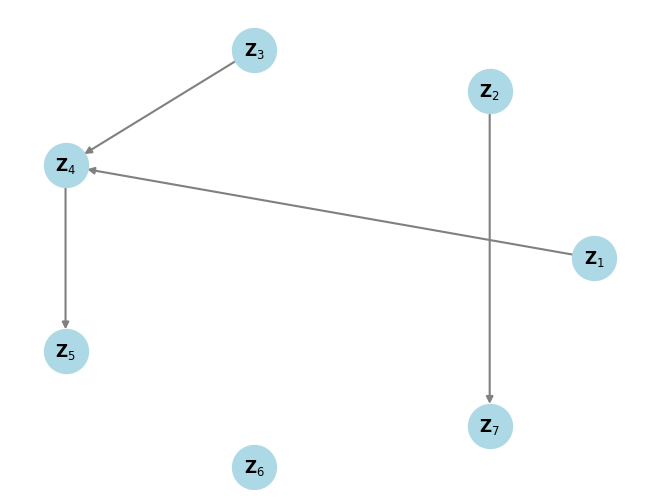

In [185]:
dag.draw_DAG()

In [ ]:
def plot_causal_graph(matrix, variables, model, edge_intensity=None):
    # Initialize empty lists for FROM and TO
    src_node = []
    dest_node = []

    # Iterate over rows
    for i, row in enumerate(matrix):
        # Iterate over columns
        for j, value in enumerate(row):
            # If value is 1, add variable name to FROM list and column name to TO list
            if value == 1:
                src_node.append(variables[i])
                dest_node.append(variables[j])

    # Create graph object
    G = nx.DiGraph()
    
    # Add all nodes to the graph
    for variable in variables:
        G.add_node(variable)
    
    # Add edges from FROM to TO
    for from_node, to_node in zip(src_node, dest_node):
        # Exclude self-connections
        if from_node != to_node:
            G.add_edge(from_node, to_node)

    # Plot the graph
    fig, ax = plt.subplots(figsize=(7, 7))
    pos = nx.circular_layout(G)

    # Draw nodes with fancy shapes and colors
    node_size = 5000
    node_color = ["lightblue" for _ in range(len(G.nodes))]
    node_shape = "o"  # Circle shape
    node_style = "solid"  # Solid outline
    node_alpha = 0.75
    nx.draw_networkx(G, pos, arrows=True, node_size=node_size, node_color=node_color, node_shape=node_shape,
                     edge_color='midnightblue', width=2, connectionstyle='arc3, rad=0.25',
                     edgecolors="midnightblue", linewidths=2, alpha=node_alpha, font_size=16,
                     font_weight='bold', ax=ax, arrowsize=20)  # Adjust arrowsize

    ax.set(facecolor="white")
    ax.grid(False)
    ax.set_xlim([1.1 * x for x in ax.get_xlim()])
    ax.set_ylim([1.1 * y for y in ax.get_ylim()])

    plt.axis('off')
    plt.subplots_adjust(wspace=0.15, hspace=0.05)
    
    # Add title
    # plt.title('Discovered Causal Structure')

    # Save plot
    plot_path = "/home/ahmad/Projects/cdmi/plots/cgraphs/"
    filename = plot_path + f"causal_graphs_{model}.pdf"
    plt.tight_layout()
    # plt.savefig(filename)
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Your function (assuming already defined)
# def plot_causal_graph(matrix, variables, model, edge_intensity=None):
#     ...

# -----------------------------
# Dummy data
variables = ["X1", "X2", "X3", "X4", "X5"]

# Example adjacency matrix (1 = edge, 0 = no edge)
# Row = FROM, Column = TO
matrix = np.array([
    [0, 1, 0, 0, 1],  # X1 -> X2, X5
    [0, 0, 1, 0, 0],  # X2 -> X3
    [0, 0, 0, 1, 0],  # X3 -> X4
    [0, 0, 0, 0, 0],  # X4 -> no outgoing edges
    [1, 0, 0, 0, 0],  # X5 -> X1 (creates a cycle if you want)
])

model = "dummy_model"

# Call the function
plot_causal_graph(matrix, variables, model)

print(f"Causal graph saved for {model}")
